In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('air_quality.csv',encoding='unicode_escape')
# Reading the dataset

In [3]:
df.head(-5)
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18


In [4]:
df.shape


(435742, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [9]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

# Data Visualization

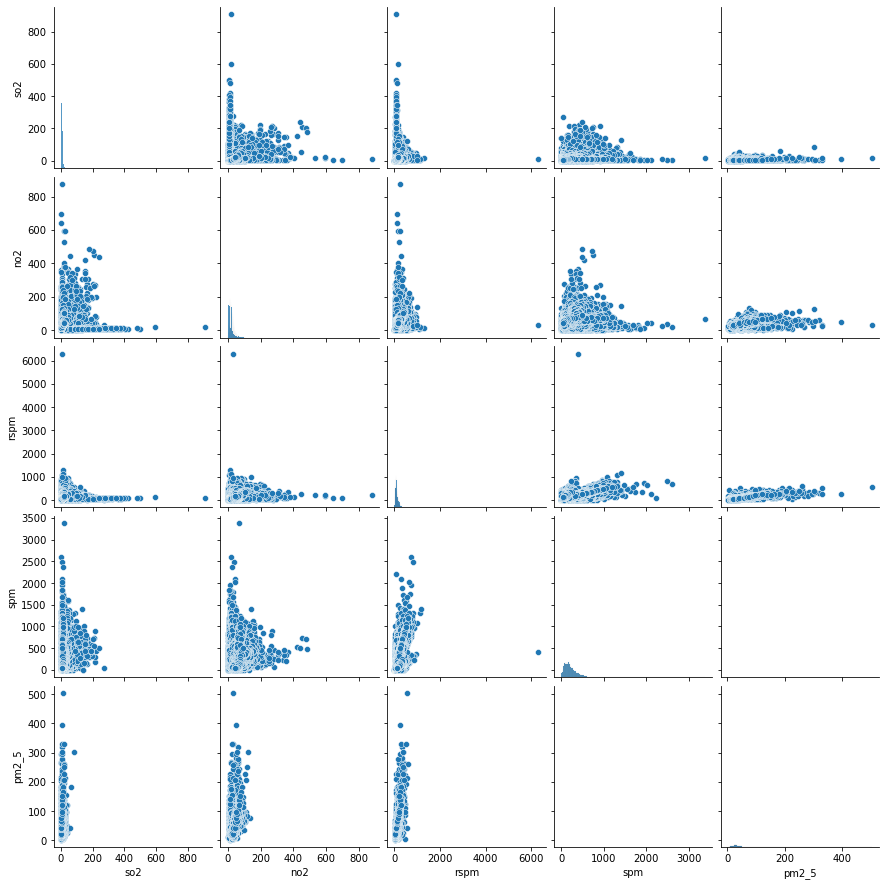

In [10]:
sns.pairplot(data=df)

In [11]:
df['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

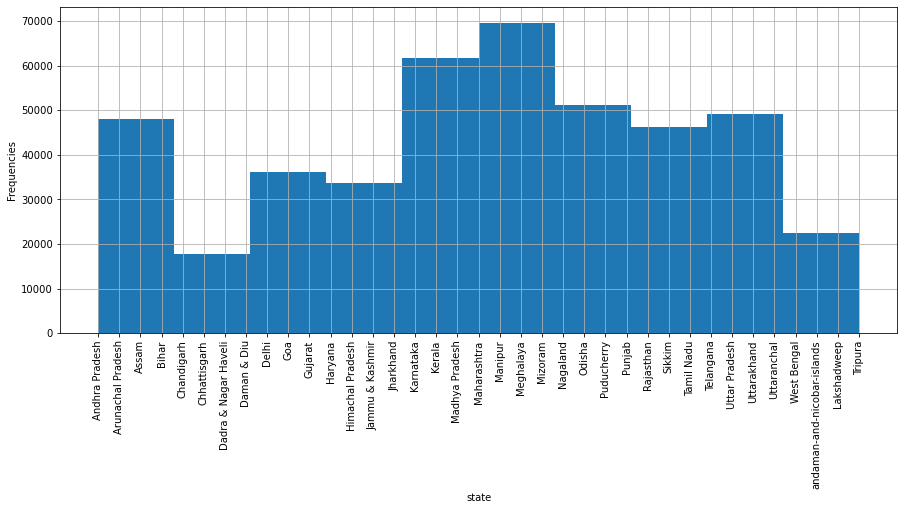

In [12]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [13]:
df['type'].value_counts()
# Viewing the count of values present in the type column


Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

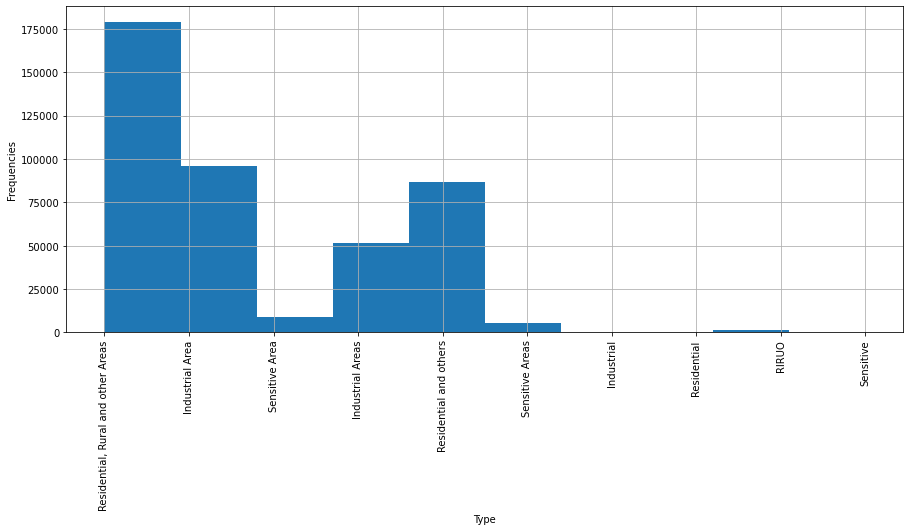

In [14]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

In [15]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: agency, Length: 64, dtype: int64

[]

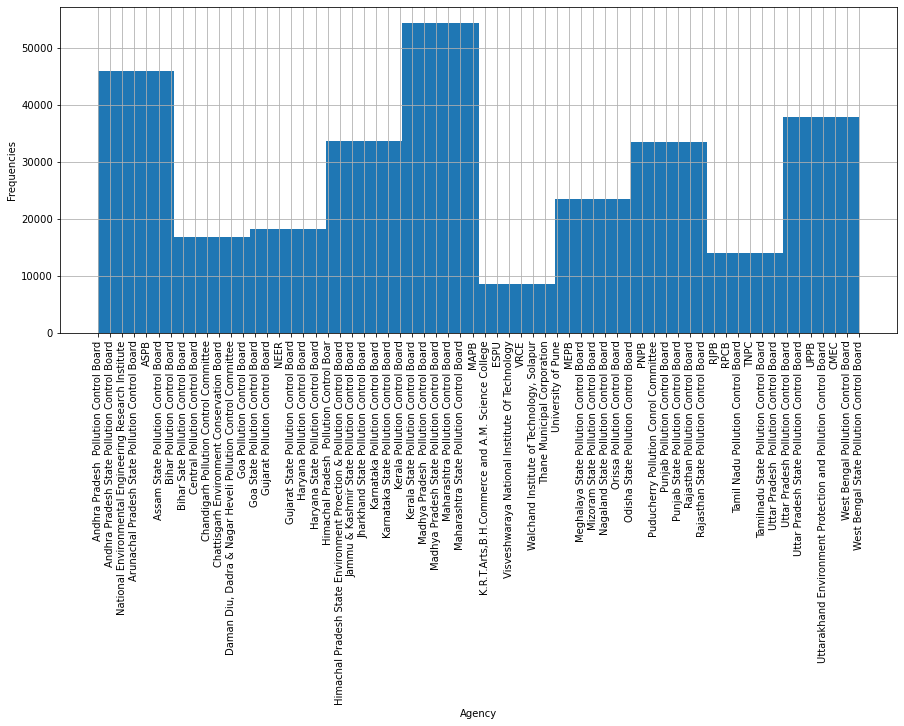

In [16]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

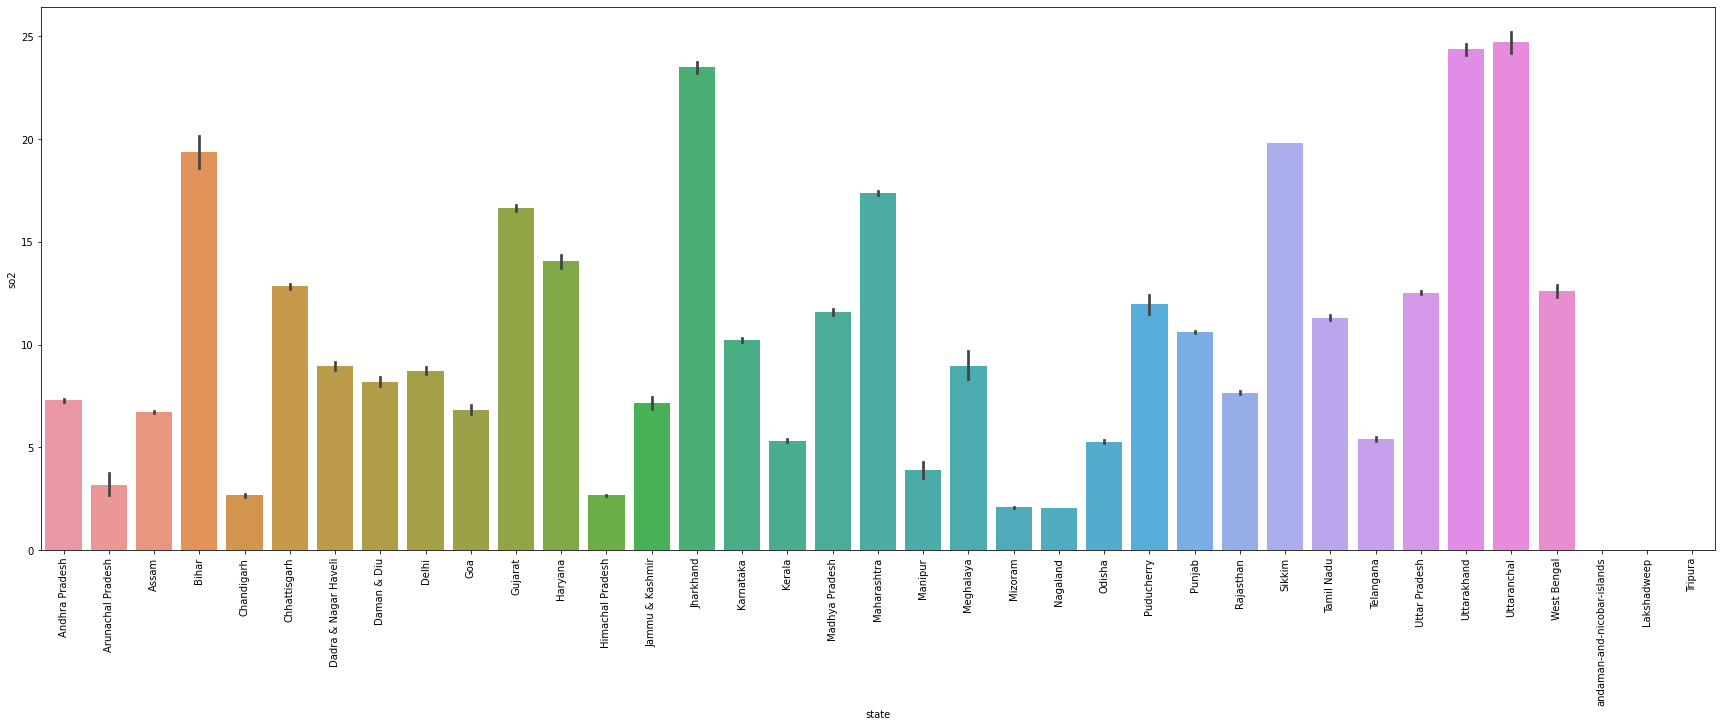

In [17]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [18]:
plt.rcParams['figure.figsize']=(30,10)

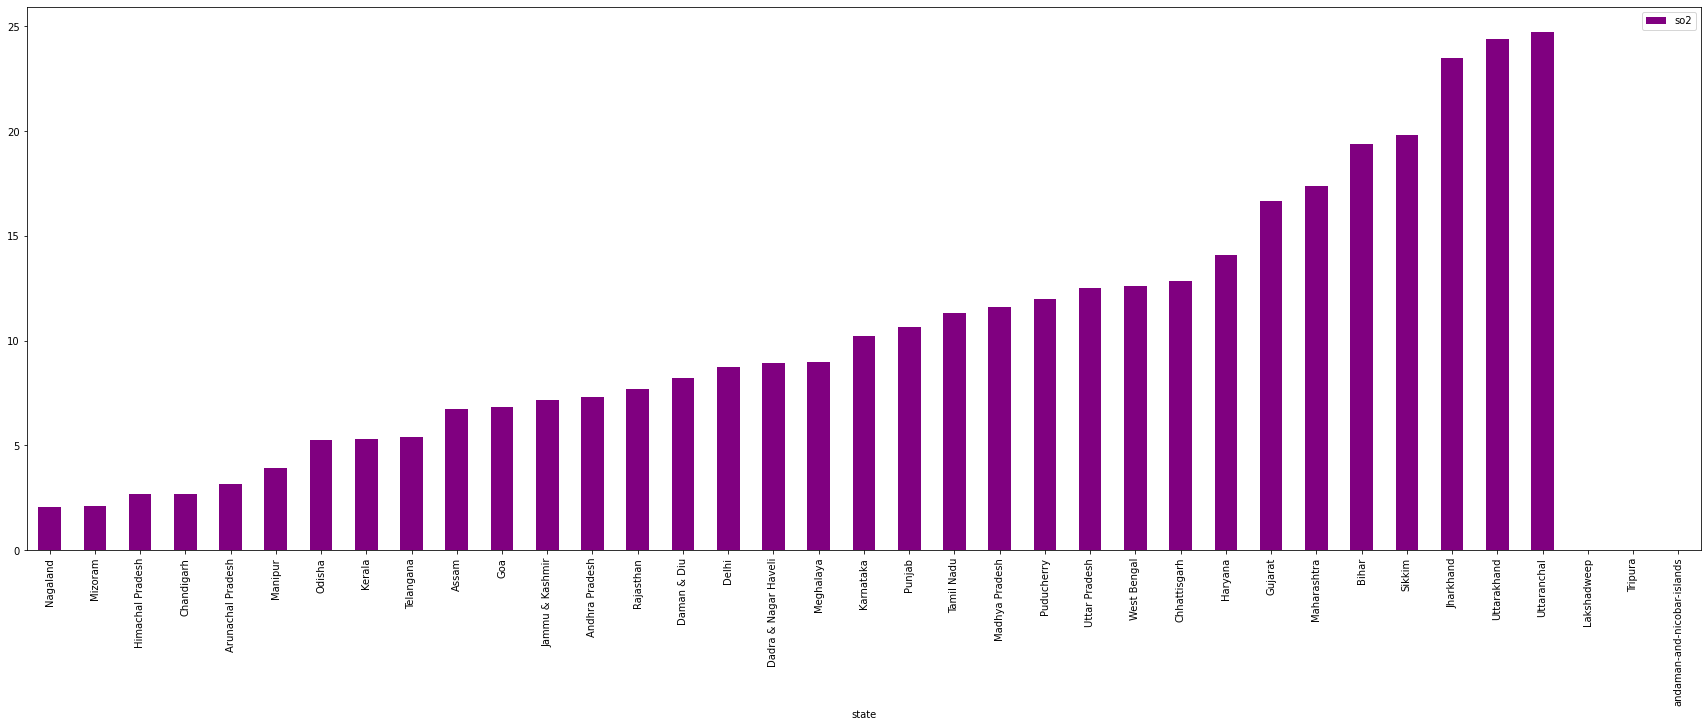

In [19]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

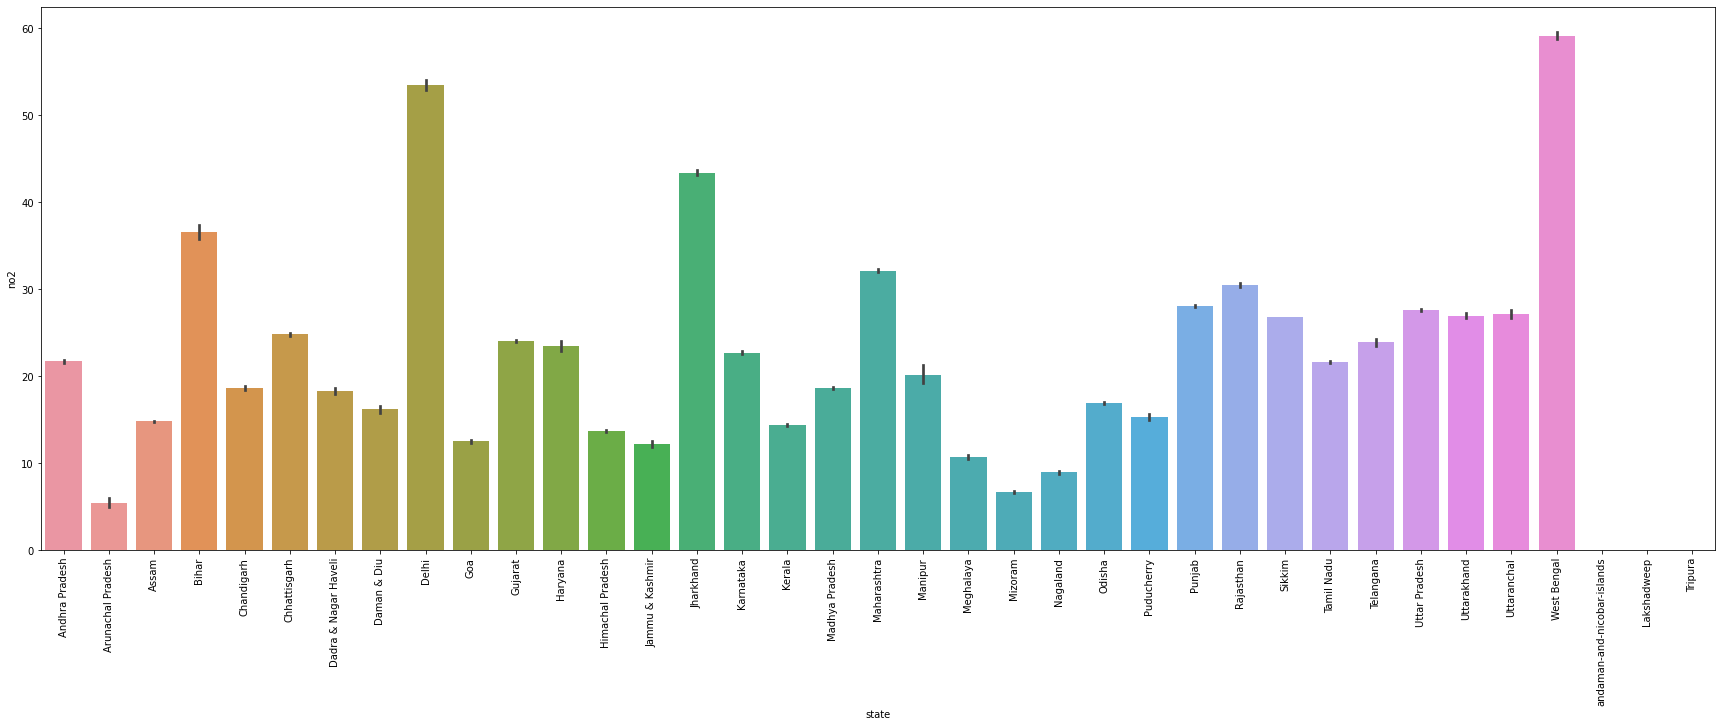

In [20]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states 

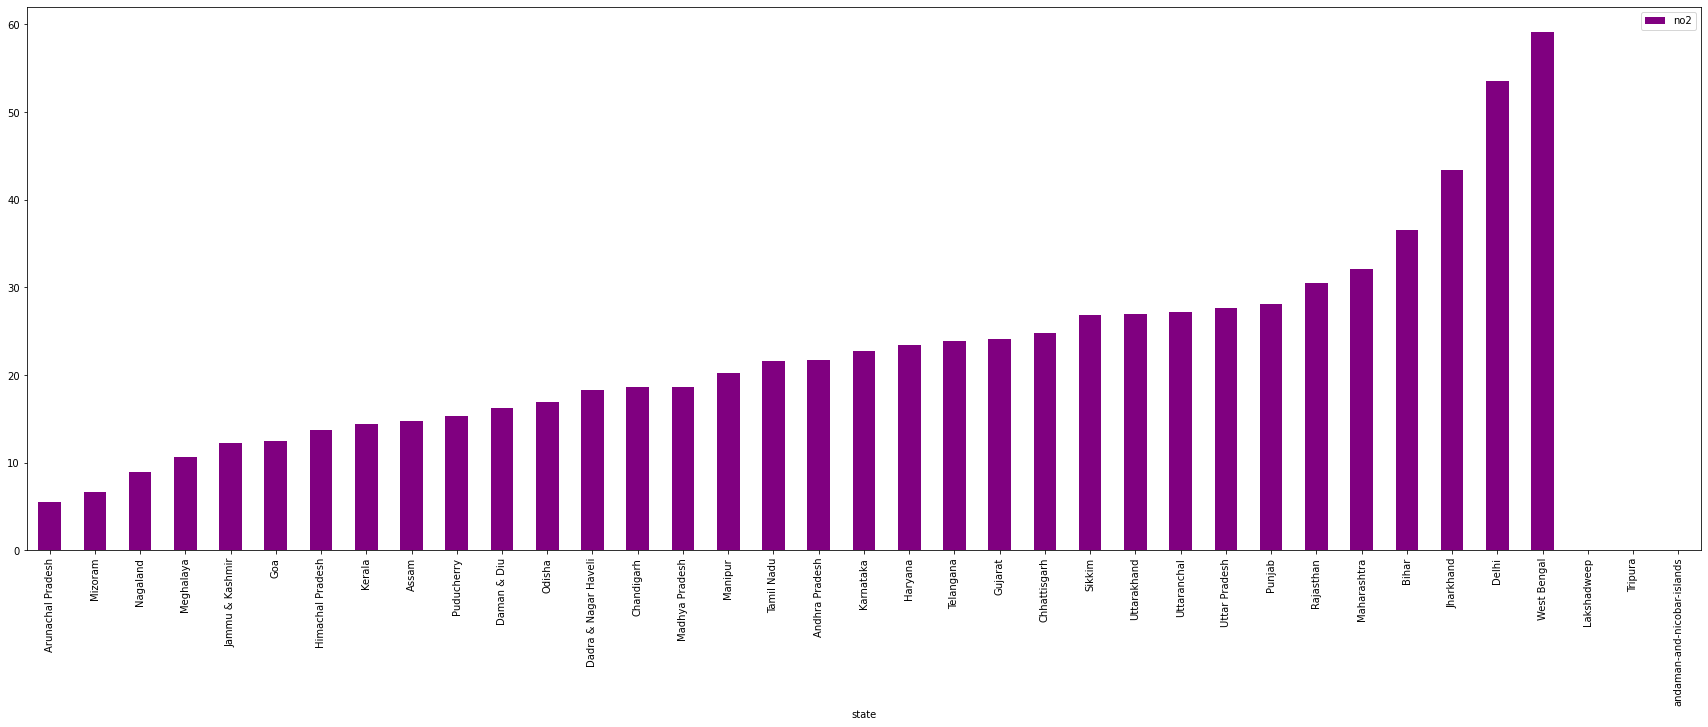

In [21]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels

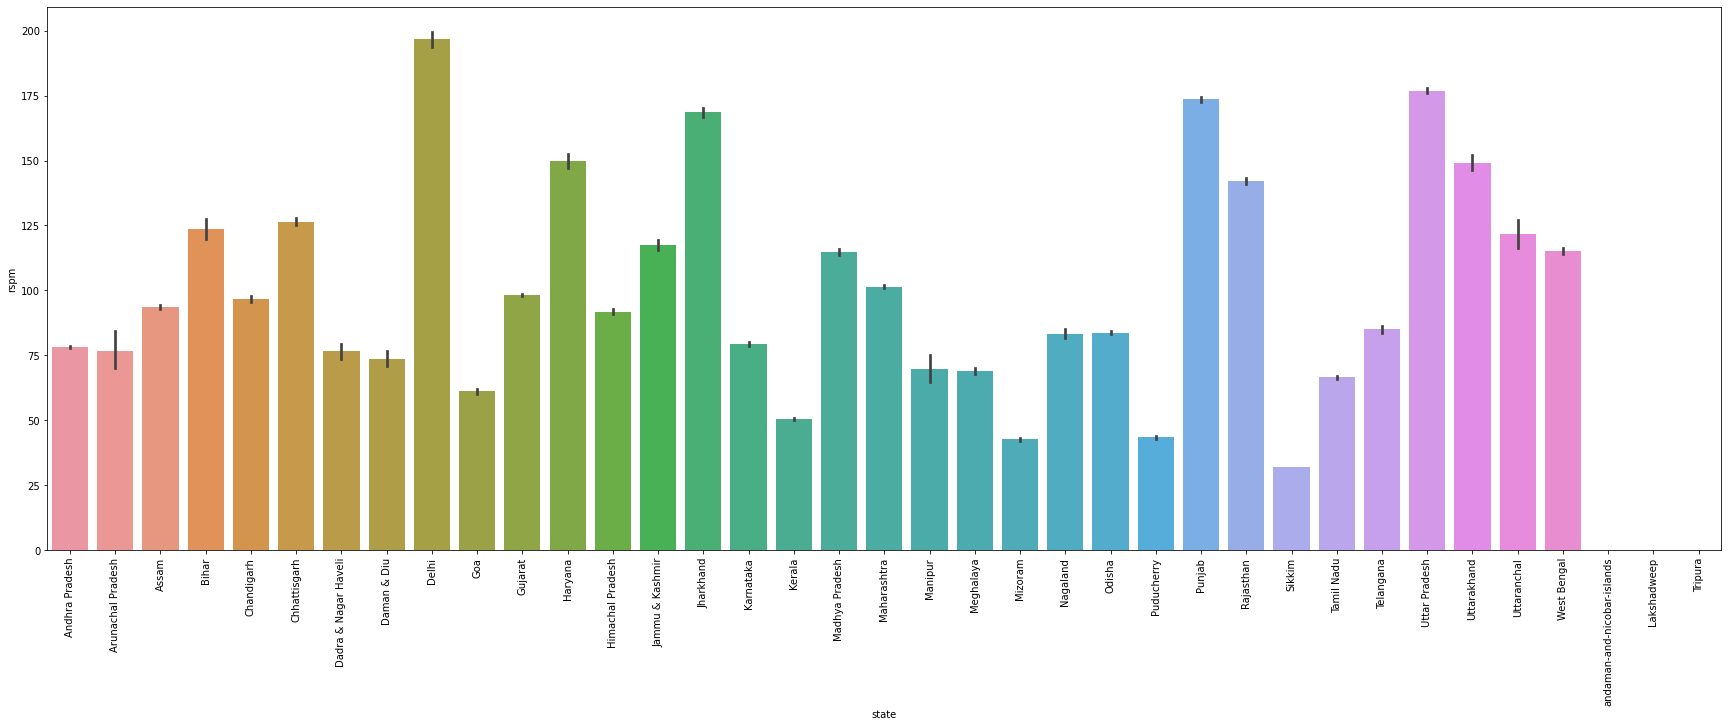

In [22]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states 

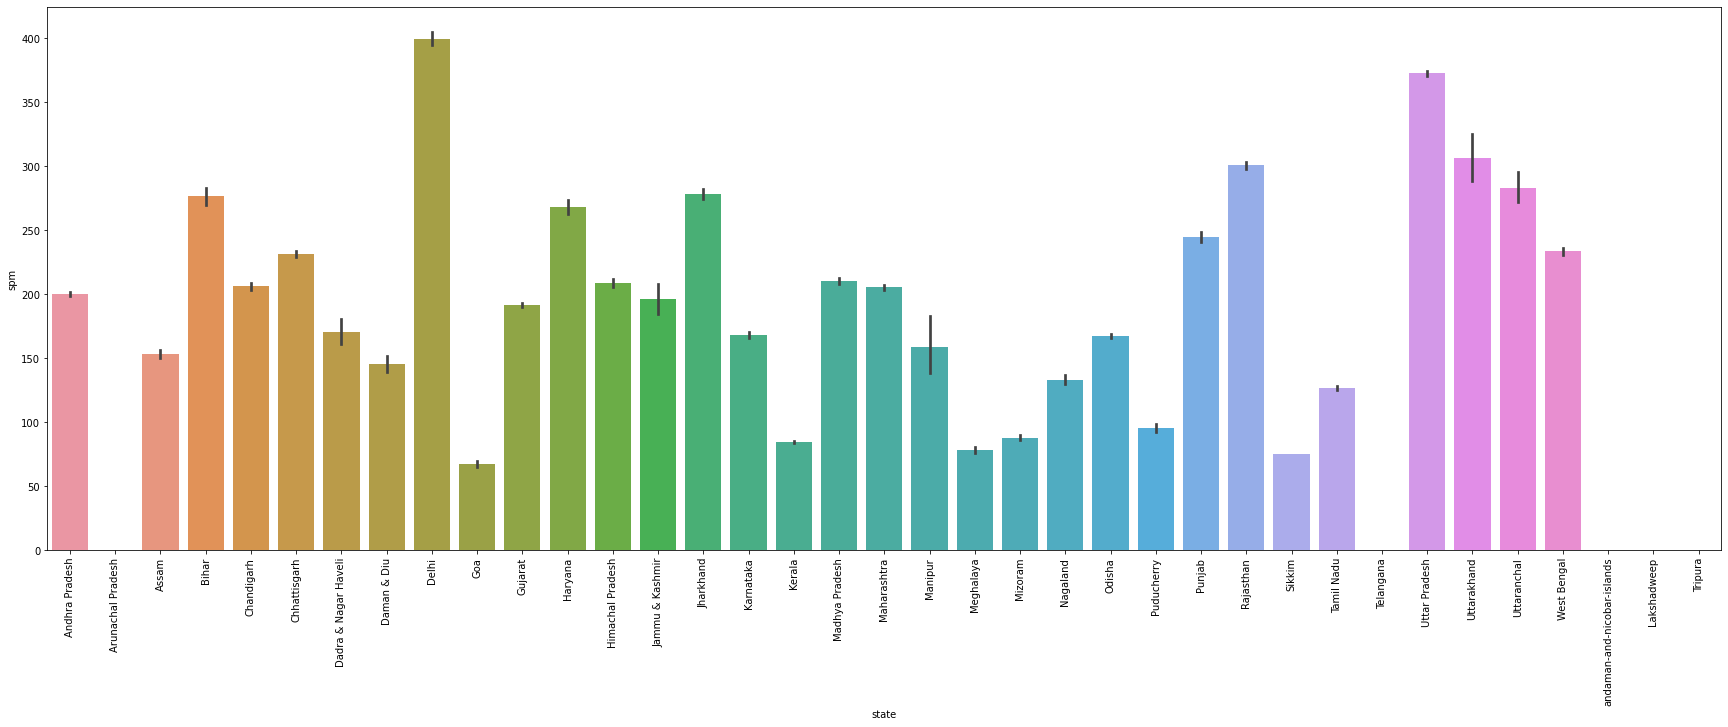

In [23]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states 

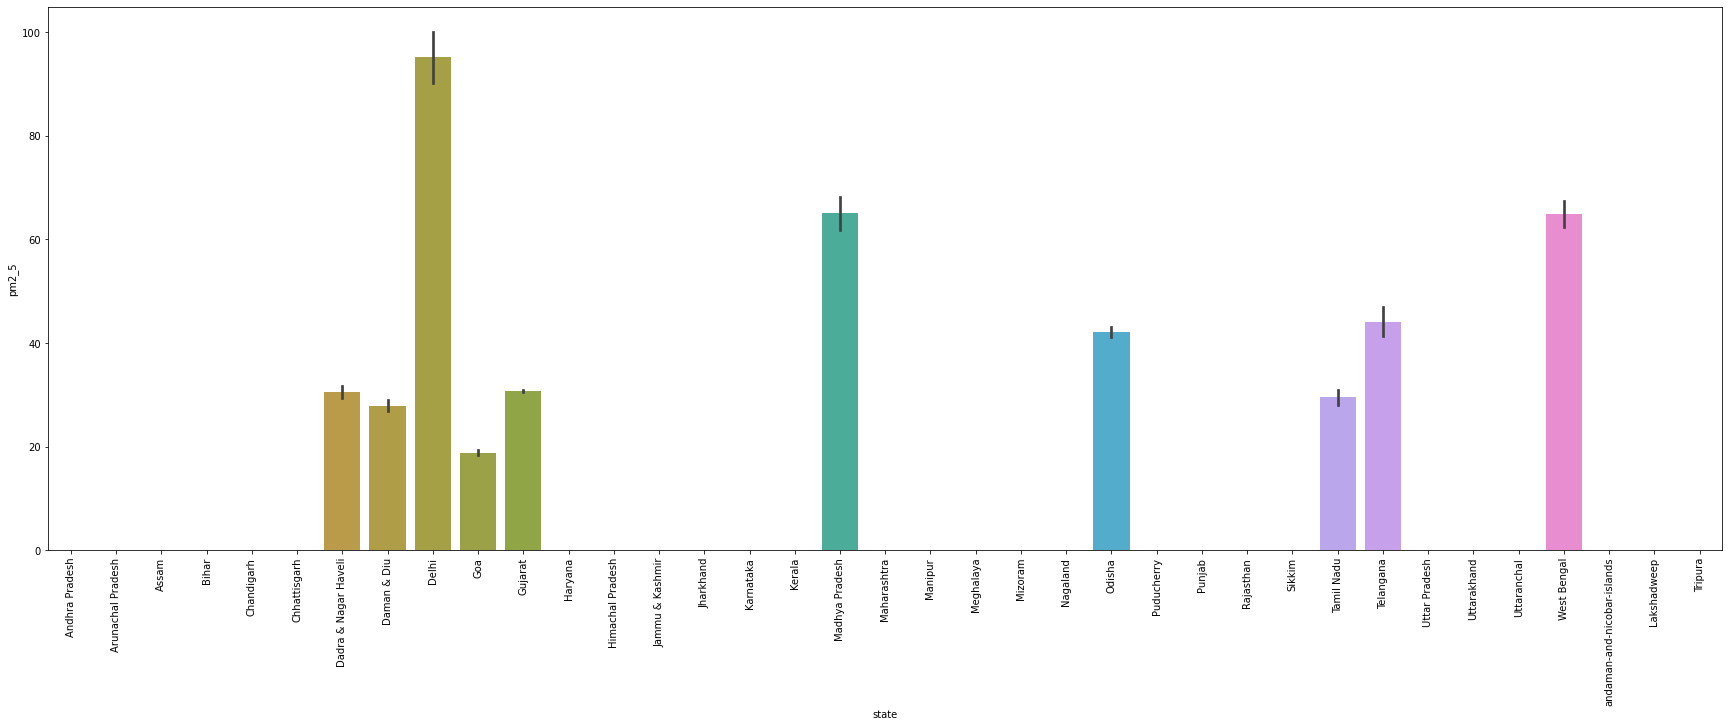

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states 

# Checking all null values and treating those null values

In [25]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [26]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [27]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [28]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [29]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [30]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
# df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [31]:
df.isnull().sum()
# Now checking the null values

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
date             7
dtype: int64

In [32]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [34]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [35]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
dtype: int64

In [36]:
df
# The following features are important for our machine learning models

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,2015-12-29
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

In [37]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['si']=df['so2'].apply(calculate_si)
data= df[['so2','si']]
data.head()


,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [38]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['ni']=df['no2'].apply(calculate_ni)
data= df[['no2','ni']]
data.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [39]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['rpi']=df['rspm'].apply(calculate_si)
data= df[['rspm','rpi']]
data.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [40]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
df['spi']=df['spm'].apply(calculate_spi)
data= df[['spm','spi']]
data.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [41]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
data= df[['date','state','si','ni','rpi','spi','AQI']]
data.head(-5)

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,0.000000,0.0,21.750000
1,1990-02-01,Andhra Pradesh,3.875,8.750,0.000000,0.0,8.750000
2,1990-02-01,Andhra Pradesh,7.750,35.625,0.000000,0.0,35.625000
3,1990-03-01,Andhra Pradesh,7.875,18.375,0.000000,0.0,18.375000
4,1990-03-01,Andhra Pradesh,5.875,9.375,0.000000,0.0,9.375000
...,...,...,...,...,...,...,...
435732,2015-12-09,West Bengal,27.500,95.000,121.666667,0.0,121.666667
435733,2015-12-12,West Bengal,42.500,108.750,127.000000,0.0,127.000000
435734,2015-12-15,West Bengal,25.000,87.500,122.666667,0.0,122.666667
435735,2015-12-18,West Bengal,21.250,87.500,117.000000,0.0,117.000000


In [42]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head(-5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,1990-02-01,6.000,21.750,0.000000,0.0,21.750000,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,1990-02-01,3.875,8.750,0.000000,0.0,8.750000,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,1990-02-01,7.750,35.625,0.000000,0.0,35.625000,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,1990-03-01,7.875,18.375,0.000000,0.0,18.375000,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,1990-03-01,5.875,9.375,0.000000,0.0,9.375000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435732,West Bengal,ULUBERIA,RIRUO,22.0,50.0,145.0,0.0,0.0,2015-12-09,27.500,95.000,121.666667,0.0,121.666667,Poor
435733,West Bengal,ULUBERIA,RIRUO,34.0,61.0,161.0,0.0,0.0,2015-12-12,42.500,108.750,127.000000,0.0,127.000000,Poor
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,0.0,0.0,2015-12-15,25.000,87.500,122.666667,0.0,122.666667,Poor
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,0.0,0.0,2015-12-18,21.250,87.500,117.000000,0.0,117.000000,Poor


In [43]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Poor              224285
Moderate           86450
Good               56947
Unhealthy          33510
Hazardous          18701
Very unhealthy     15849
Name: AQI_Range, dtype: int64

In [44]:
##Splitting the dataset into Dependent and Independent columns¶
X=df[['si','ni','rpi','spi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,si,ni,rpi,spi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [45]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348593, 4) (87149, 4) (348593,) (87149,)


# Linear Regression

In [47]:

model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [48]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [49]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  31.886095957422224
RMSE TestData =  31.914612150294367
--------------------------------------------------
RSquared value on train: 0.9269785346755282
RSquared value on test: 0.9263397150760339


# Decision Tree Regressor

In [50]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [51]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [52]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  4.131511730793907e-13
RMSE TestData =  2.684142642702488
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9994789667535321


# Random Forest Regressor

In [53]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [54]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [55]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  1.4971306665623945
RMSE TestData =  2.293998851314714
--------------------------------------------------
RSquared value on train: 0.9998390217288318
RSquared value on test: 0.9996194246593905


# Classification Algorithms

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
X2 = df[['si','ni','rpi','spi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification 

In [58]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data 

# Logistic Regression

In [59]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.5863804046624901
Model accuracy on test is:  0.5874195903890956
--------------------------------------------------
KappaScore is:  0.30196125123608775


In [60]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Poor'], dtype=object)

In [61]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Poor'], dtype=object)

In [62]:
log_reg.predict([[10,2.8,82,20]])

array(['Poor'], dtype=object)

In [63]:
log_reg.predict([[2,45.8,37,32]])

array(['Poor'], dtype=object)

# Decision Tree Classifier

In [64]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9995966480058417
--------------------------------------------------
KappaScore is:  0.9993967224602988


In [65]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9995827393163879
--------------------------------------------------
KappaScore is:  0.9993759186077071


# Random Forest Classifier

In [66]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9997426892451059
--------------------------------------------------
KappaScore is:  0.9996151164705671


# K-Nearest Neighbours

In [67]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9959102165804067
Model accuracy on test is:  0.9926075315553392
--------------------------------------------------
KappaScore is:  0.98893399316011


# Predictions on random values

In [68]:
a=KNN.predict([[7.4,47.7,78.182,100]]) 
b=KNN.predict([[1,1.2,3.12,0]]) 
c=KNN.predict([[325.7,345,798.182,203]]) 
print(a)
print(b)
print(c)

['Poor']
['Good']
['Very unhealthy']
